In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

In [2]:
years = range(2008,2023)
df_dict = {}
# mapping: new column name: {first year this name was used: name in file}
columns = {'weight': {2008: 'V201', 2009: 'v200', 2010: 'V101', 2012: 'weight_vv', 2013: 'weight', 2016: 
                       'commonweight', 2017: 'weights_common', 2018: 'commonweight'}, 
           'gender': {2008: 'V208', 2009: 'v208', 2010: 'V208', 2012: 'gender', 2021: 'gender4'},
           'education': {2008: 'V213', 2009: 'v213', 2010: 'V213', 2012: 'educ'}, 
           'race': {2008: 'V211', 2009: 'v211', 2010: 'V211', 2012: 'race'},
           'votereg': {2008: 'V256', 2009: 'v256', 2010: 'V203', 2012: 'votereg'},
           'pid3': {2008: 'CC307', 2009: 'cc423',  2010: 'V212a', 2012: 'pid3'}, 
           'pid7': {2008: 'CC307a', 2009: 'cc424', 2010: 'V212d', 2012: 'pid7'},
           'presidentapproval': {2008: 'CC335bush', 2009: 'cc09_43e', 2010: 'CC308a', 2011: 'CC320a', 2012: 'CC308a',
                                 2013: 'CC312a', 2014: 'CC14_308a', 2015: 'CC15_312a', 2016: 'CC16_320a',
                                 2017: 'CC17_322a', 2018: 'CC18_308a', 2019: 'CC19_308a', 2020: 'CC20_320a',
                                 2021: 'CC21_315a', 2022: 'CC22_320a'},
            'congressapproval': {2008: 'CC335cong', 2009: 'cc09_43d', 2010: 'CC308b', 2011: 'NONE', 2012: 'CC308b',
                                 2013: 'CC312b', 2014: 'CC14_308b', 2015: 'NONE', 2016: 'CC16_320b',
                                 2017: 'NONE', 2018: 'CC18_308b', 2019: 'NONE', 2020: 'CC20_320b',
                                 2021: 'CC21_315b', 2022: 'CC22_320b'},
            'supremecourtapproval': {2008: 'CC335sup', 2009: 'NONE', 2010: 'CC308c', 2011: 'NONE', 2012: 'CC308c',
                                 2013: 'CC312c', 2014: 'CC14_308c', 2015: 'CC15_312e', 2016: 'CC16_320c',
                                 2017: 'CC17_322d', 2018: 'CC18_308c', 2019: 'CC19_308d', 2020: 'CC20_320c',
                                 2021: 'CC21_315c', 2022: 'CC22_320c'},
            'abortion': {2014: 'CC14_323_1', 2015: 'CC15_322a', 2016: 'CC16_332a', 2017: 'CC17_332a',
                         2018: 'CC18_321a', 2019: 'CC19_321a', 2020: 'CC20_332a', 2021: 'CC21_323a', 2022: 'CC22_332a'},
            'guncontrol': {2013: 'CC13_320c', 2014: 'CC14_320c', 2015: 'CC15_320c', 2016: 'CC16_330d',
                           2017: 'CC17_330c', 2018: 'CC18_320c', 2019: 'CC19_320c', 2020: 'CC20_330b',
                           2021: 'CC21_321a', 2022: 'CC22_330b'},
            'bordersecurity': {2010: 'CC322_2', 2011: 'CC351_2', 2012: 'CC322_2', 2013: 'CC326_2', 2014: 'CC14_322_2',
                               2015: 'CC15_321_2', 2016: 'CC16_331_2', 2017: 'CC17_331_2', 2018: 'NONE', 2019: 'CC19_322e',
                               2020: 'CC20_331b', 2021: 'CC21_322b', 2022: 'CC22_331b'},
            'enviornment': {2014: 'CC14_326_1', 2015: 'CC15_323_1', 2016: 'CC16_333a', 2017: 'CC17_333a', 2018: 'CC18_415a',
                            2019: 'CC19_340a', 2020: 'CC20_333a', 2021: 'CC21_324a', 2022: 'CC22_333a'}}
dta_range = [2009, 2010]
extreme7 = [1, 'Strong Democrat', 'strong democrat', 7, 'Strong Republican', 'strong republican']

In [3]:
def gen_col_names(year):
    col_names_dict = {}
    for col in columns:
        yearly_dict = columns[col]
        max_year = 0
        for y in yearly_dict.keys():
            if year >= y and y > max_year:
                max_year = y
        if max_year > 0 and yearly_dict[max_year] != 'NONE':
            col_names_dict[col] = yearly_dict[max_year]
    return col_names_dict

In [4]:
for year in years:
    print(year)
    if year in dta_range:
        filepath = f'data/CESdata{year}.dta'
        curr_df = pd.read_stata(filepath)
    else:
        filepath = f'data/CESdata{year}.tab'
        curr_df = pd.read_csv(filepath, delimiter='\t', on_bad_lines='warn')
    col_names_dict = gen_col_names(year)
    trimmed_df = curr_df[list(col_names_dict.values())].copy()
    for new_name in col_names_dict:
        trimmed_df.rename(columns={col_names_dict[new_name]: new_name}, inplace=True)
    df_dict[year] = trimmed_df

2008


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (25,27,288,297,305,317,336,338,385,386,387,396,404,416,435,437) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2009
2010
2011
2012


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (257,259,261,282,284,286,288,328,346,358,368,369,370,384,385,387,388,389,391,394,406,410,471,472,477,478) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2013
2014


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (270) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2015


b'Skipping line 4148: expected 254 fields, saw 480\n'


2016


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (46,47,48,49,50,51,52,53,54,55,370,371,373,374,375,376,377,378,379,380,381,382,383,385,386,388,389,390,391,393,394,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,419,420,422,423,424,425,426,427,430,432,436,439,441,443,445,446,447,448,449,450,451,452,453,454,455,456,458,460,462,486,487,493,494,513,515,520,522,526,527,528,533,534,535,541,542,543,544,545,559,560) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2017
2018


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (275,276,283,290,329,335,342,346,359,406,420,438,439,456,457,464,471,518,519) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2019
2020


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (331,332,333,334,335,340,341,342,343,344,608,609,610,611,612,613,614,615,616,617,618,619,620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


2021
2022


/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (362,363,366,367,616,617,620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
lengths = []
for year in range(2008, 2023):
    lengths.append(len(df_dict[year].index))
print(f"Min sample size {min(lengths)}")
print(f"Max sample size {max(lengths)}")
print(f"Average sample size {np.mean(lengths)}")

Min sample size 13800
Max sample size 64600
Average sample size 38068.86666666667


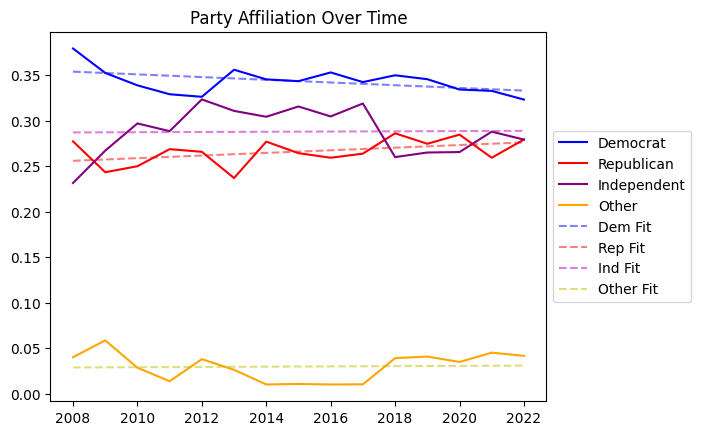

In [15]:
dem_percent = []
rep_percent = []
ind_percent = []
other_percent = []
pid_range = np.arange(2008,2023)
for year in pid_range:
    dem_percent.append(np.dot(df_dict[year]['pid3'].isin([1, 'Democrat', 'democrat ']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    rep_percent.append(np.dot(df_dict[year]['pid3'].isin([2, 'Republican', 'republican ']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    ind_percent.append(np.dot(df_dict[year]['pid3'].isin([3, 'Independent', 'independent ']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    other_percent.append(np.dot(df_dict[year]['pid3'].isin([4, 'Other', 'other ']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
plt.plot(pid_range, dem_percent, c='blue')
plt.plot(pid_range, rep_percent, c='red')
plt.plot(pid_range, ind_percent, c='purple')
plt.plot(pid_range, other_percent, c='orange')

def linear_fit(x, y):
    coefficients = np.polyfit(x, y, 1)
    poly = np.poly1d(coefficients)
    return poly(x)
dem_fit = linear_fit(pid_range, dem_percent)
rep_fit = linear_fit(pid_range, rep_percent)
ind_fit = linear_fit(pid_range, ind_percent)
other_fit = linear_fit(pid_range, other_percent)

plt.plot(pid_range, dem_fit, 'b--', alpha=0.5)
plt.plot(pid_range, rep_fit, 'r--', alpha=0.5)
plt.plot(pid_range, ind_fit, 'm--', alpha=0.5)
plt.plot(pid_range, other_fit, 'y--', alpha=0.5)

plt.legend(["Democrat", "Republican", "Independent", "Other", "Dem Fit", "Rep Fit", "Ind Fit", "Other Fit"], loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Party Affiliation Over Time")
plt.savefig("figures/party_affiliation.png", bbox_inches='tight')
plt.show()

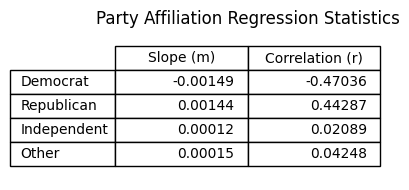

In [16]:
def regression_stats(x, y):
    slope, _, r_value, _, _ = stats.linregress(x, y)
    return round(slope, 5), round(r_value,5)

dem_stats = regression_stats(pid_range, dem_percent)
rep_stats = regression_stats(pid_range, rep_percent)
ind_stats = regression_stats(pid_range, ind_percent)
other_stats = regression_stats(pid_range, other_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Democrat", "Republican", "Independent", "Other"]
data = [dem_stats, rep_stats, ind_stats, other_stats]

fig, ax = plt.subplots(1, 1, figsize=(4, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title('Party Affiliation Regression Statistics')
plt.tight_layout()  # Improve the layout
plt.savefig('figures/party_affiliation_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()


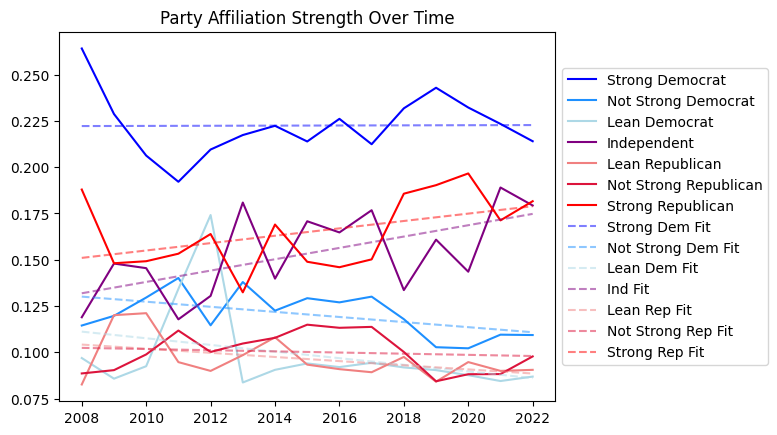

In [10]:
strong_dem_percent = []
not_strong_dem_percent = []
lean_dem_percent = []
ind_percent = []
lean_rep_percent = []
not_strong_rep_percent = []
strong_rep_percent = []
pid_range = np.arange(2008,2023)
for year in pid_range:
    strong_dem_percent.append(np.dot(df_dict[year]['pid7'].isin([1, 'Strong Democrat', 'strong democrat']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    not_strong_dem_percent.append(np.dot(df_dict[year]['pid7'].isin([2, 'Not very strong Democrat', 'not very strong democrat']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    lean_dem_percent.append(np.dot(df_dict[year]['pid7'].isin([3, 'Lean Democrat', 'lean democrat']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    ind_percent.append(np.dot(df_dict[year]['pid7'].isin([4, 'Independent', 'independent']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    lean_rep_percent.append(np.dot(df_dict[year]['pid7'].isin([5, 'Lean Republican', 'lean republican']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    not_strong_rep_percent.append(np.dot(df_dict[year]['pid7'].isin([6, 'Not very strong Republican', 'not very strong republican']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    strong_rep_percent.append(np.dot(df_dict[year]['pid7'].isin([7, 'Strong Republican', 'strong republican']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))

plt.plot(pid_range, strong_dem_percent, c='blue')
plt.plot(pid_range, not_strong_dem_percent, c='dodgerblue')
plt.plot(pid_range, lean_dem_percent, c='lightblue')
plt.plot(pid_range, ind_percent, c='purple')
plt.plot(pid_range, lean_rep_percent, c='lightcoral')
plt.plot(pid_range, not_strong_rep_percent, c='crimson')
plt.plot(pid_range, strong_rep_percent, c='red')

fit_strong_dem = linear_fit(pid_range, strong_dem_percent)
fit_not_strong_dem = linear_fit(pid_range, not_strong_dem_percent)
fit_lean_dem = linear_fit(pid_range, lean_dem_percent)
fit_ind = linear_fit(pid_range, ind_percent)
fit_lean_rep = linear_fit(pid_range, lean_rep_percent)
fit_not_strong_rep = linear_fit(pid_range, not_strong_rep_percent)
fit_strong_rep = linear_fit(pid_range, strong_rep_percent)

plt.plot(pid_range, fit_strong_dem, color='blue', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_not_strong_dem, color='dodgerblue', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_lean_dem, color='lightblue', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_ind, color='purple', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_lean_rep, color='lightcoral', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_not_strong_rep, color='crimson', linestyle='--', alpha=0.5)
plt.plot(pid_range, fit_strong_rep, color='red', linestyle='--', alpha=0.5)

plt.legend(["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
            "Lean Republican", "Not Strong Republican", "Strong Republican",
            "Strong Dem Fit", "Not Strong Dem Fit", "Lean Dem Fit", "Ind Fit",
            "Lean Rep Fit", "Not Strong Rep Fit", "Strong Rep Fit"],
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Party Affiliation Strength Over Time")
plt.savefig("figures/party_affiliation_strength.png", bbox_inches='tight')
plt.show()

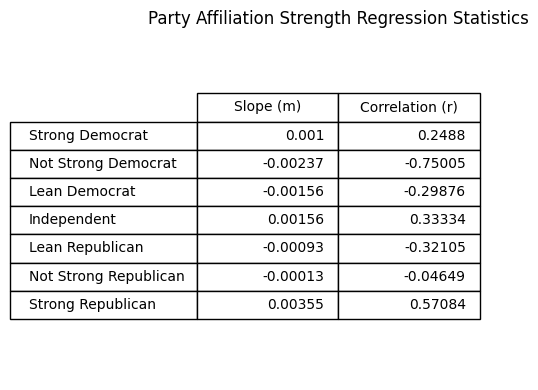

In [24]:
dem_stats_strong = regression_stats(pid_range, strong_dem_percent)
dem_stats_not_strong = regression_stats(pid_range, not_strong_dem_percent)
dem_stats_lean = regression_stats(pid_range, lean_dem_percent)
ind_stats = regression_stats(pid_range, ind_percent)
rep_stats_lean = regression_stats(pid_range, lean_rep_percent)
rep_stats_not_strong = regression_stats(pid_range, not_strong_rep_percent)
rep_stats_strong = regression_stats(pid_range, strong_rep_percent)

# Data for the table
columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
        "Lean Republican", "Not Strong Republican", "Strong Republican"]
data = [dem_stats_strong, dem_stats_not_strong, dem_stats_lean, ind_stats,
        rep_stats_lean, rep_stats_not_strong, rep_stats_strong]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title('Party Affiliation Strength Regression Statistics')
plt.tight_layout()  # Improve the layout
plt.savefig('figures/party_affiliation_strength_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

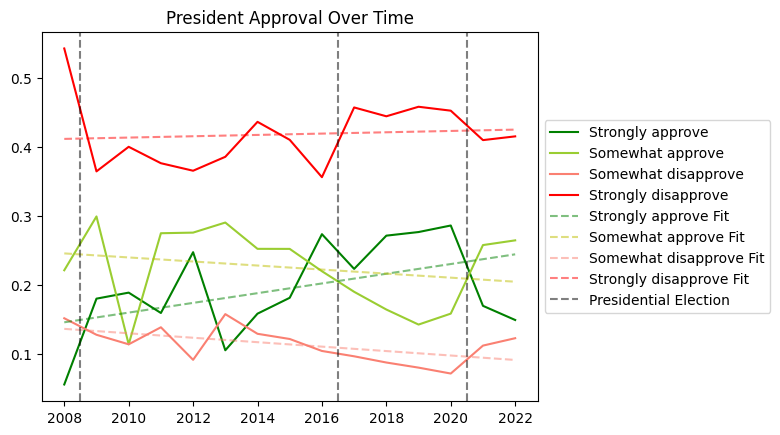

In [13]:
sta_percent = []
swa_percent = []
swd_percent = []
std_percent = []
pid_range = np.arange(2008,2023)
for year in pid_range:
    sta_percent.append(np.dot(df_dict[year]['presidentapproval'].isin([1, 'strongly approve', 'Strongly Approve']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    swa_percent.append(np.dot(df_dict[year]['presidentapproval'].isin([2, 'approve', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    swd_percent.append(np.dot(df_dict[year]['presidentapproval'].isin([3, 'disapprove', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    std_percent.append(np.dot(df_dict[year]['presidentapproval'].isin([4, 'strongly disapprove', 'Strongly Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
plt.plot(pid_range, sta_percent, c='green')
plt.plot(pid_range, swa_percent, c='yellowgreen')
plt.plot(pid_range, swd_percent, c='salmon')
plt.plot(pid_range, std_percent, c='red')

sta_fit = linear_fit(pid_range, sta_percent)
swa_fit = linear_fit(pid_range, swa_percent)
swd_fit = linear_fit(pid_range, swd_percent)
std_fit = linear_fit(pid_range, std_percent)

plt.plot(pid_range, sta_fit, 'g--', alpha=0.5)
plt.plot(pid_range, swa_fit, 'y--', alpha=0.5)
plt.plot(pid_range, swd_fit, 'salmon', linestyle='--', alpha=0.5)
plt.plot(pid_range, std_fit, 'r--', alpha=0.5)

plt.axvline(x=2008.5, color='black', label='Obama Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2016.5, color='black', label='Trump Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2020.5, color='black', label='Biden Elected', linestyle='--', alpha=0.5)

plt.legend(["Strongly approve", "Somewhat approve", "Somewhat disapprove", "Strongly disapprove",
            "Strongly approve Fit", "Somewhat approve Fit", "Somewhat disapprove Fit", "Strongly disapprove Fit",
            "Presidential Election"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("President Approval Over Time")
plt.savefig("figures/presidential_approval.png", bbox_inches='tight')
plt.show()

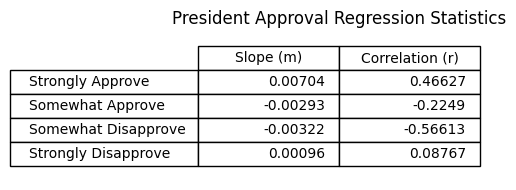

In [14]:
sta_stats = regression_stats(pid_range, sta_percent)
swa_stats = regression_stats(pid_range, swa_percent)
swd_stats = regression_stats(pid_range, swd_percent)
std_stats = regression_stats(pid_range, std_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strongly Approve", "Somewhat Approve", "Somewhat Disapprove", "Strongly Disapprove"]
data = [sta_stats, swa_stats, swd_stats, std_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title('President Approval Regression Statistics')
plt.tight_layout()  # Improve the layout
plt.savefig('figures/presidential_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

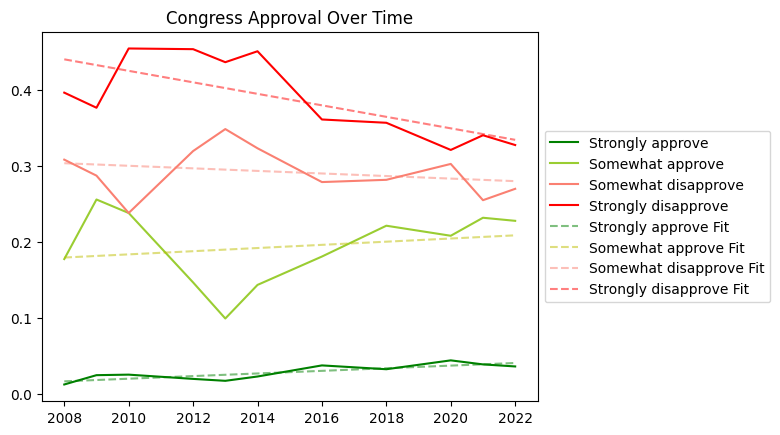

In [15]:
sta_percent = []
swa_percent = []
swd_percent = []
std_percent = []
pid_range = np.arange(2008,2023)
empty_years = []
for year in pid_range:
    if 'congressapproval' in df_dict[year]:
        sta_percent.append(np.dot(df_dict[year]['congressapproval'].isin([1, 'strongly approve', 'Strongly Approve']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        swa_percent.append(np.dot(df_dict[year]['congressapproval'].isin([2, 'approve', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        swd_percent.append(np.dot(df_dict[year]['congressapproval'].isin([3, 'disapprove', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        std_percent.append(np.dot(df_dict[year]['congressapproval'].isin([4, 'strongly disapprove', 'Strongly Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    else:
        empty_years.append(year)
pid_range = pid_range[~np.isin(pid_range, empty_years)]


plt.plot(pid_range, sta_percent, c='green')
plt.plot(pid_range, swa_percent, c='yellowgreen')
plt.plot(pid_range, swd_percent, c='salmon')
plt.plot(pid_range, std_percent, c='red')

sta_fit = linear_fit(pid_range, sta_percent)
swa_fit = linear_fit(pid_range, swa_percent)
swd_fit = linear_fit(pid_range, swd_percent)
std_fit = linear_fit(pid_range, std_percent)

plt.plot(pid_range, sta_fit, 'g--', alpha=0.5)
plt.plot(pid_range, swa_fit, 'y--', alpha=0.5)
plt.plot(pid_range, swd_fit, 'salmon', linestyle='--', alpha=0.5)
plt.plot(pid_range, std_fit, 'r--', alpha=0.5)

plt.legend(["Strongly approve", "Somewhat approve", "Somewhat disapprove", "Strongly disapprove",
            "Strongly approve Fit", "Somewhat approve Fit", "Somewhat disapprove Fit", "Strongly disapprove Fit",], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Congress Approval Over Time")
plt.savefig("figures/congress_approval.png", bbox_inches='tight')
plt.show()

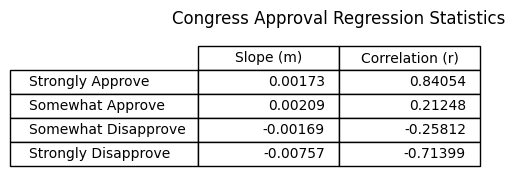

In [17]:
sta_stats = regression_stats(pid_range, sta_percent)
swa_stats = regression_stats(pid_range, swa_percent)
swd_stats = regression_stats(pid_range, swd_percent)
std_stats = regression_stats(pid_range, std_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strongly Approve", "Somewhat Approve", "Somewhat Disapprove", "Strongly Disapprove"]
data = [sta_stats, swa_stats, swd_stats, std_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title('Congress Approval Regression Statistics')
plt.tight_layout()  # Improve the layout
plt.savefig('figures/congress_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

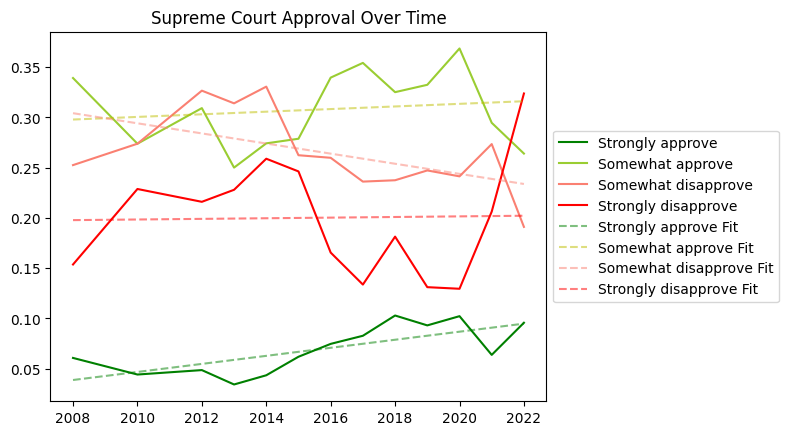

In [18]:
sta_percent = []
swa_percent = []
swd_percent = []
std_percent = []
pid_range = np.arange(2008,2023)
empty_years = []
for year in pid_range:
    if 'supremecourtapproval' in df_dict[year]:
        sta_percent.append(np.dot(df_dict[year]['supremecourtapproval'].isin([1, 'strongly approve', 'Strongly Approve']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        swa_percent.append(np.dot(df_dict[year]['supremecourtapproval'].isin([2, 'approve', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        swd_percent.append(np.dot(df_dict[year]['supremecourtapproval'].isin([3, 'disapprove', 'Somewhat Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
        std_percent.append(np.dot(df_dict[year]['supremecourtapproval'].isin([4, 'strongly disapprove', 'Strongly Disapprove']), df_dict[year]['weight'])/np.sum(df_dict[year]['weight']))
    else:
        empty_years.append(year)
pid_range = pid_range[~np.isin(pid_range, empty_years)]


plt.plot(pid_range, sta_percent, c='green')
plt.plot(pid_range, swa_percent, c='yellowgreen')
plt.plot(pid_range, swd_percent, c='salmon')
plt.plot(pid_range, std_percent, c='red')

sta_fit = linear_fit(pid_range, sta_percent)
swa_fit = linear_fit(pid_range, swa_percent)
swd_fit = linear_fit(pid_range, swd_percent)
std_fit = linear_fit(pid_range, std_percent)

plt.plot(pid_range, sta_fit, 'g--', alpha=0.5)
plt.plot(pid_range, swa_fit, 'y--', alpha=0.5)
plt.plot(pid_range, swd_fit, 'salmon', linestyle='--', alpha=0.5)
plt.plot(pid_range, std_fit, 'r--', alpha=0.5)

plt.legend(["Strongly approve", "Somewhat approve", "Somewhat disapprove", "Strongly disapprove",
            "Strongly approve Fit", "Somewhat approve Fit", "Somewhat disapprove Fit", "Strongly disapprove Fit",], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Supreme Court Approval Over Time")
plt.savefig("figures/supreme_court_approval.png", bbox_inches='tight')
plt.show()

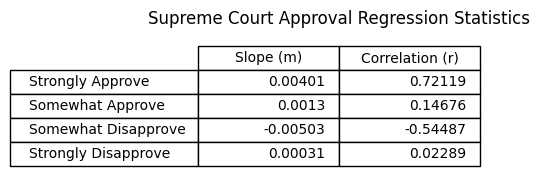

In [19]:
sta_stats = regression_stats(pid_range, sta_percent)
swa_stats = regression_stats(pid_range, swa_percent)
swd_stats = regression_stats(pid_range, swd_percent)
std_stats = regression_stats(pid_range, std_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strongly Approve", "Somewhat Approve", "Somewhat Disapprove", "Strongly Disapprove"]
data = [sta_stats, swa_stats, swd_stats, std_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title('Supreme Court Approval Regression Statistics')
plt.tight_layout()  # Improve the layout
plt.savefig('figures/supreme_court_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

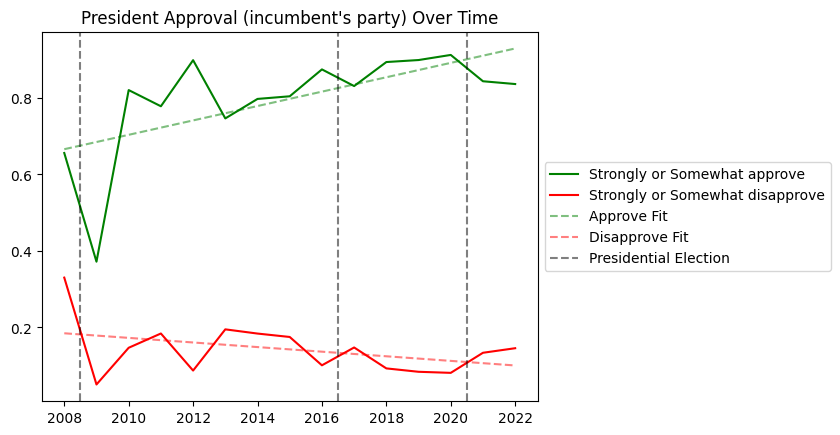

In [20]:
approve_percent = []
disapprove_percent = []
pid_range = np.arange(2008,2023)
for year in pid_range:
    if (year >= 2009 and year <= 2016) or year >= 2021:
        # Democrat
        relevant_approval = df_dict[year]['pid3'].isin([1, 'Democrat', 'democrat '])
        total_weight = np.sum(df_dict[year]['pid3'].isin([1, 'Democrat', 'democrat ']) * df_dict[year]['weight'])
    else:
        # Republican
        relevant_approval = df_dict[year]['pid3'].isin([2, 'Republican', 'republican '])
        total_weight = np.sum(df_dict[year]['pid3'].isin([2, 'Republican', 'republican ']) * df_dict[year]['weight'])
    approve_percent.append(np.dot(relevant_approval * df_dict[year]['presidentapproval'].isin([1, 'strongly approve', 'Strongly Approve', 2, 'somewhat approve', 'Somewhat Approve']), df_dict[year]['weight'])/np.sum(total_weight))
    disapprove_percent.append(np.dot(relevant_approval * df_dict[year]['presidentapproval'].isin([3, 'somewhat disapprove', 'Somewhat Disapprove', 4, 'strongly disapprove', 'Strongly Disapprove']), df_dict[year]['weight'])/np.sum(total_weight))
plt.plot(pid_range, approve_percent, c='green')
plt.plot(pid_range, disapprove_percent, c='red')

approve_fit = linear_fit(pid_range, approve_percent)
disapprove_fit = linear_fit(pid_range, disapprove_percent)

plt.plot(pid_range, approve_fit, 'g--', alpha=0.5)
plt.plot(pid_range, disapprove_fit, 'r--', alpha=0.5)

plt.axvline(x=2008.5, color='black', label='Obama Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2016.5, color='black', label='Trump Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2020.5, color='black', label='Biden Elected', linestyle='--', alpha=0.5)

plt.legend(["Strongly or Somewhat approve", "Strongly or Somewhat disapprove",
            "Approve Fit", "Disapprove Fit",
            "Presidential Election"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("President Approval (incumbent's party) Over Time")
plt.savefig("figures/presidential_approval_party.png", bbox_inches='tight')
plt.show()

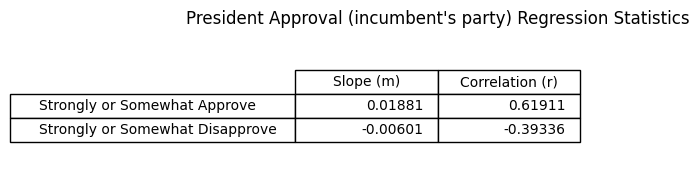

In [21]:
approve_stats = regression_stats(pid_range, approve_percent)
disapprove_stats = regression_stats(pid_range, disapprove_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strongly or Somewhat Approve", "Strongly or Somewhat Disapprove"]
data = [approve_stats, disapprove_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("President Approval (incumbent's party) Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/presidential_approval_party_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

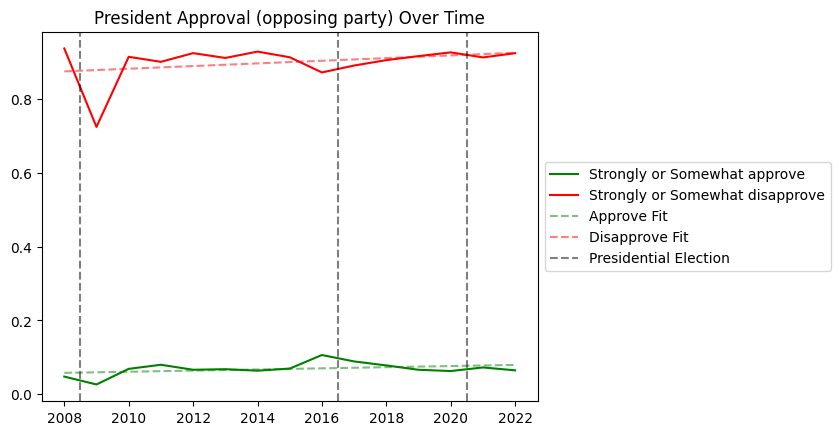

In [24]:
opposing_approve_percent = []
opposing_disapprove_percent = []
pid_range = np.arange(2008,2023)
for year in pid_range:
    if (year >= 2009 and year <= 2016) or year >= 2021:
        # Republican
        relevant_approval = df_dict[year]['pid3'].isin([2, 'Republican', 'republican '])
        total_weight = np.sum(df_dict[year]['pid3'].isin([2, 'Republican', 'republican ']) * df_dict[year]['weight'])
    else:
        # Democrat
        relevant_approval = df_dict[year]['pid3'].isin([1, 'Democrat', 'democrat '])
        total_weight = np.sum(df_dict[year]['pid3'].isin([1, 'Democrat', 'democrat ']) * df_dict[year]['weight'])
        
    opposing_approve_percent.append(np.dot(relevant_approval * df_dict[year]['presidentapproval'].isin([1, 'strongly approve', 'Strongly Approve', 2, 'somewhat approve', 'Somewhat Approve']), df_dict[year]['weight'])/np.sum(total_weight))
    opposing_disapprove_percent.append(np.dot(relevant_approval * df_dict[year]['presidentapproval'].isin([3, 'somewhat disapprove', 'Somewhat Disapprove', 4, 'strongly disapprove', 'Strongly Disapprove']), df_dict[year]['weight'])/np.sum(total_weight))
plt.plot(pid_range, opposing_approve_percent, c='green')
plt.plot(pid_range, opposing_disapprove_percent, c='red')

opposing_approve_fit = linear_fit(pid_range, opposing_approve_percent)
opposing_disapprove_fit = linear_fit(pid_range, opposing_disapprove_percent)

plt.plot(pid_range, opposing_approve_fit, 'g--', alpha=0.5)
plt.plot(pid_range, opposing_disapprove_fit, 'r--', alpha=0.5)

plt.axvline(x=2008.5, color='black', label='Obama Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2016.5, color='black', label='Trump Elected', linestyle='--', alpha=0.5)
plt.axvline(x=2020.5, color='black', label='Biden Elected', linestyle='--', alpha=0.5)

plt.legend(["Strongly or Somewhat approve", "Strongly or Somewhat disapprove",
            "Approve Fit", "Disapprove Fit",
            "Presidential Election"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("President Approval (opposing party) Over Time")
plt.savefig("figures/presidential_approval_opposing.png", bbox_inches='tight')
plt.show()

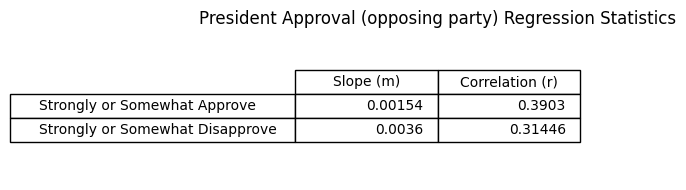

In [26]:
opposing_approve_stats = regression_stats(pid_range, opposing_approve_percent)
opposing_disapprove_stats = regression_stats(pid_range, opposing_disapprove_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Strongly or Somewhat Approve", "Strongly or Somewhat Disapprove"]
data = [opposing_approve_stats, opposing_disapprove_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("President Approval (opposing party) Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/presidential_approval_opposing_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

['Social media', 'TV news', 'Newspaper', 'Radio news']
[0.32518947832141704, 0.32659360105156976, 0.2167915218904541, 0.18476603100912273]
['Social media', 'TV news', 'Newspaper', 'Radio news']
[0.0, 0.0, 0.0, 0.0]


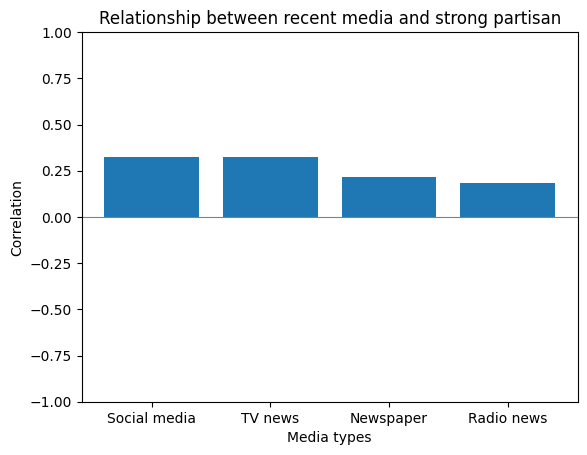

In [56]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["Social media", "TV news", "Newspaper", "Radio news"]
correlations = {}
p_values = {}
for i in range(1,5):
    col = f"CC22_300_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin(extreme7), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between recent media and strong partisan")
plt.xlabel("Media types")
plt.ylabel("Correlation")
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_types_strong_partisan_corr.png")
plt.show()

    

/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (362,363,366,367,616,617,620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.13845476665110448, 0.14379168639329584, 0.13143816720176918, 0.14414170339919868, 0.17817585009364975, 0.1276439281222111, 0.07726214338901602]
['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[1.568597776385743e-254, 1.4293792878698098e-274, 2.2299200578691813e-229, 6.505493216253513e-276, 0.0, 2.4366218992461767e-216, 4.153482258816218e-80]


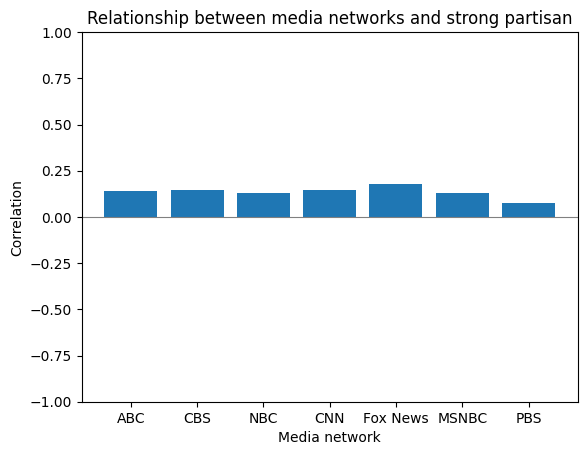

In [57]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["ABC", "CBS", "NBC", "CNN", "Fox News", "MSNBC", "PBS"]
correlations = {}
p_values = {}
for i in range(1,8):
    col = f"CC22_300b_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin(extreme7), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between media networks and strong partisan")
plt.xlabel("Media network")
plt.ylabel("Correlation")
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_networks_strong_partisan_corr.png")
plt.show()

    

['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.11803503194188732, 0.1140947510554057, 0.1294109807091489, 0.2090424924058035, -0.022962007461891292, 0.20451210650731075, 0.11563258614174175]
['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[4.455000835251352e-185, 5.5314208590447024e-173, 2.3096100605892808e-222, 0.0, 1.853526640441948e-08, 0.0, 1.1824593408033927e-177]


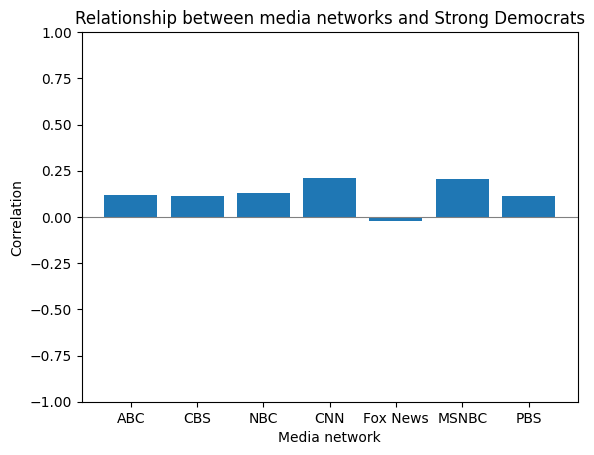

In [59]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["ABC", "CBS", "NBC", "CNN", "Fox News", "MSNBC", "PBS"]
correlations = {}
p_values = {}
for i in range(1,8):
    col = f"CC22_300b_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin([1, 'Strong Democrat', 'strong democrat']), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between media networks and Strong Democrats")
plt.xlabel("Media network")
plt.ylabel("Correlation") 
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_networks_strong_partisan_dem.png")
plt.show()

    

/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (362,363,366,367,616,617,620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.06759730375472917, 0.07819624449575847, 0.047829546566074466, -0.010743997369728656, 0.2516185516478644, -0.02777501999802311, -0.009131948859668133]
['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[1.0304734166187406e-61, 5.126453102187096e-82, 9.801820304063789e-32, 0.008494577997041258, 0.0, 1.0130675245166285e-11, 0.025295390894575377]


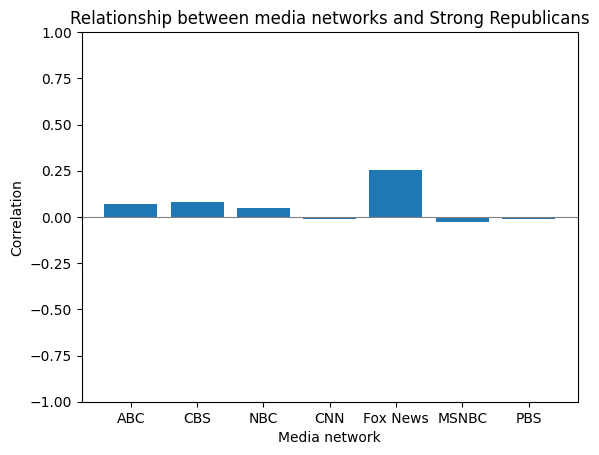

In [60]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["ABC", "CBS", "NBC", "CNN", "Fox News", "MSNBC", "PBS"]
correlations = {}
p_values = {}
for i in range(1,8):
    col = f"CC22_300b_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin([7, 'Strong Republican', 'strong republican']), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between media networks and Strong Republicans")
plt.xlabel("Media network")
plt.ylabel("Correlation") 
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_networks_strong_partisan_rep.png")
plt.show()

    

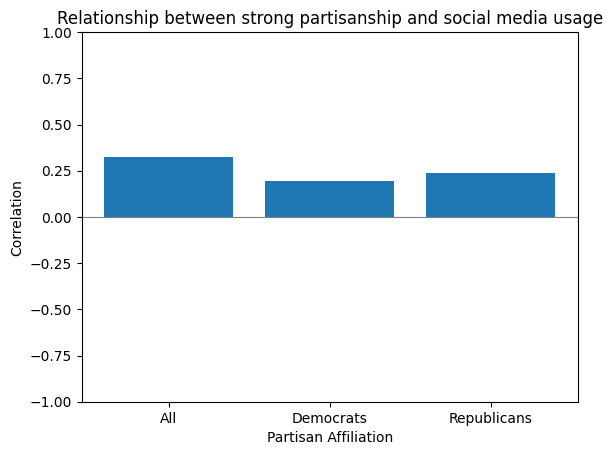

: 

In [122]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
cols_to_check = ["CC22_300d_1", "CC22_300d_2", "CC22_300d_3", "CC22_300d_4", "CC22_300d_5"]
labels = ["All", "Democrats", "Republicans"]
correlations = []
correlations = []
p_values = {}
consumers = np.multiply(df22[cols_to_check].any(axis=1), df22['commonweight'])
extremeists = np.multiply(df22['pid7'].isin(extreme7), df22['commonweight'])
c, _ = pearsonr(consumers, extremeists)
correlations.append(c)
extremeists = np.multiply(df22['pid7'].isin([1, 'Strong Democrat', 'strong democrat']), df22['commonweight'])
c, _ = pearsonr(consumers, extremeists)
correlations.append(c)
extremeists = np.multiply(df22['pid7'].isin([7, 'Strong Republican', 'strong republican']), df22['commonweight'])
c, _ = pearsonr(consumers, extremeists)
correlations.append(c)


plt.bar(labels, correlations)
plt.title("Relationship between strong partisanship and social media usage")
plt.xlabel("Partisan Affiliation")
plt.ylabel("Correlation") 
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/social_media_strong_partisan.png")
plt.show()

    

['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.16251513579271304, 0.15585794487116167, 0.16998910382831356, 0.24975891326279454, -0.02073551170078974, 0.1971833990037206, 0.12314311530664425]
['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.0, 8e-323, 0.0, 0.0, 3.782650708535832e-07, 0.0, 2.2033955993877513e-201]


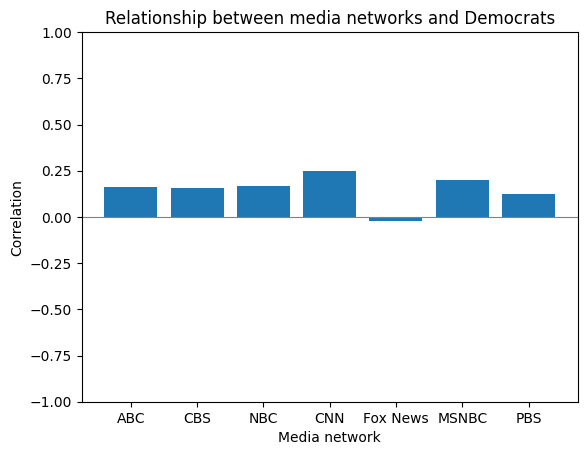

In [70]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["ABC", "CBS", "NBC", "CNN", "Fox News", "MSNBC", "PBS"]
correlations = {}
p_values = {}
for i in range(1,8):
    col = f"CC22_300b_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin([1, 2, 3]), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between media networks and Democrats")
plt.xlabel("Media network")
plt.ylabel("Correlation") 
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_networks_dem_party.png")
plt.show()

    

/Users/jamesdowns/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3508: DtypeWarning: Columns (362,363,366,367,616,617,620,621) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[0.10163280548138194, 0.11010627770221135, 0.07784601261107509, 0.028206612672014096, 0.3272842174790737, -0.01908343504662682, 0.01181882330182333]
['ABC', 'CBS', 'NBC', 'CNN', 'Fox News', 'MSNBC', 'PBS']
[1.706074504224064e-137, 3.604275951187072e-161, 2.6799799677421686e-81, 4.832490806138598e-12, 0.0, 2.9424579581265886e-06, 0.003790988260981422]


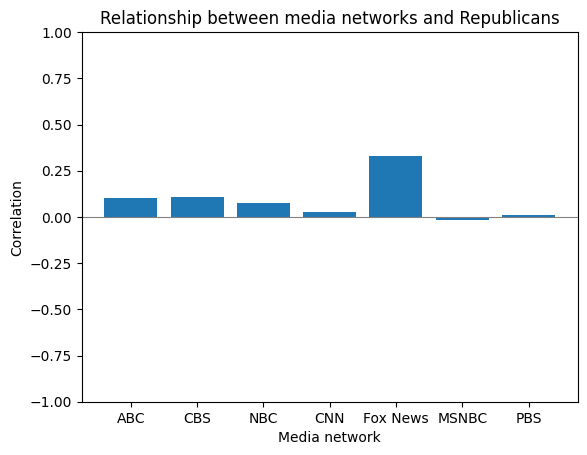

In [71]:
df22 = pd.read_csv("data/CESdata2022.tab", delimiter='\t')
labels = ["ABC", "CBS", "NBC", "CNN", "Fox News", "MSNBC", "PBS"]
correlations = {}
p_values = {}
for i in range(1,8):
    col = f"CC22_300b_{i}"
    consumers = np.multiply(df22[col].isin([1]), df22['commonweight'])
    extremeists = np.multiply(df22['pid7'].isin([5, 6, 7]), df22['commonweight'])
    correlations[labels[i-1]], p_values[labels[i-1]] = pearsonr(consumers, extremeists)

print(list(correlations.keys()))
print(list(correlations.values()))
print(list(p_values.keys()))
print(list(p_values.values()))
plt.bar(list(correlations.keys()), list(correlations.values()))
plt.title("Relationship between media networks and Republicans")
plt.xlabel("Media network")
plt.ylabel("Correlation") 
plt.axhline(0, color='grey', linewidth=0.8)
plt.ylim([-1, 1])
plt.savefig("figures/media_networks_rep_party.png")
plt.show()

    

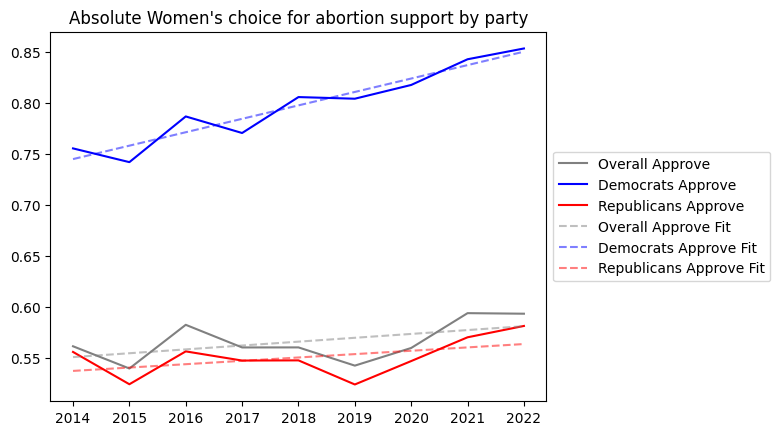

In [86]:
abortion_overall_percent = []
abortion_democrat_percent = []
abortion_republican_percent = []
pid_range = np.arange(2014,2023)
for year in pid_range:   
    year_df = df_dict[year]
    # Overall weighted approval
    overall_weight = np.sum(year_df['weight'])
    overall_approval_weighted = np.dot(year_df['abortion'] == 1, year_df['weight'])
    abortion_overall_percent.append(overall_approval_weighted / overall_weight)
    
    # Approval for Democrats
    dem_df = year_df[year_df['pid3'].isin([1, 'Democrat', 'democrat'])]
    dem_weight = np.sum(dem_df['weight'])
    dem_approval_weighted = np.dot((dem_df['abortion'] == 1), dem_df['weight'])
    abortion_democrat_percent.append(dem_approval_weighted / dem_weight)
    
    # Approval for Republicans
    rep_df = year_df[year_df['pid3'].isin([3, 'Republican', 'republican'])]
    rep_weight = np.sum(rep_df['weight'])
    rep_approval_weighted = np.dot((rep_df['abortion'] == 1), rep_df['weight'])
    abortion_republican_percent.append(rep_approval_weighted / rep_weight)
plt.plot(pid_range, abortion_overall_percent, c='grey')
plt.plot(pid_range, abortion_democrat_percent, c='blue')
plt.plot(pid_range, abortion_republican_percent, c='red')

abortion_overall_fit = linear_fit(pid_range, abortion_overall_percent)
abortion_democrat_fit = linear_fit(pid_range, abortion_democrat_percent)
abortion_republican_fit = linear_fit(pid_range, abortion_republican_percent)

plt.plot(pid_range, abortion_overall_fit, color='grey', linestyle='--', alpha=0.5)
plt.plot(pid_range, abortion_democrat_fit, 'b--', alpha=0.5)
plt.plot(pid_range, abortion_republican_fit, 'r--', alpha=0.5)

plt.legend(["Overall Approve", "Democrats Approve", "Republicans Approve",
            "Overall Approve Fit", "Democrats Approve Fit", "Republicans Approve Fit"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Absolute Women's choice for abortion support by party")
plt.savefig("figures/abortion_approval.png", bbox_inches='tight')
plt.show()

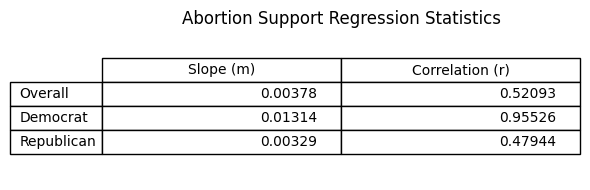

In [87]:
abortion_overall_stats = regression_stats(pid_range, abortion_overall_percent)
abortion_democrat_stats = regression_stats(pid_range, abortion_democrat_percent)
abortion_republican_stats = regression_stats(pid_range, abortion_republican_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Overall", "Democrat", "Republican"]
data = [abortion_overall_stats, abortion_democrat_stats, abortion_republican_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("Abortion Support Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/abortion_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

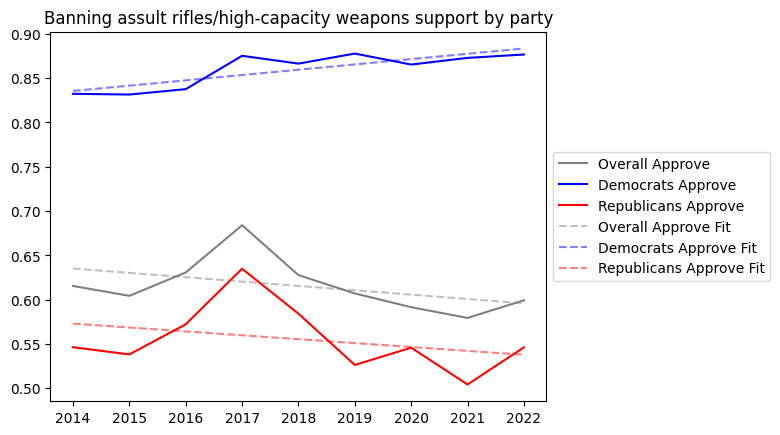

In [91]:
guncontrol_overall_percent = []
guncontrol_democrat_percent = []
guncontrol_republican_percent = []
pid_range = np.arange(2014,2023)
for year in pid_range:   
    year_df = df_dict[year]
    # Overall weighted approval
    overall_weight = np.sum(year_df['weight'])
    overall_approval_weighted = np.dot(year_df['guncontrol'] == 1, year_df['weight'])
    guncontrol_overall_percent.append(overall_approval_weighted / overall_weight)
    
    # Approval for Democrats
    dem_df = year_df[year_df['pid3'].isin([1, 'Democrat', 'democrat'])]
    dem_weight = np.sum(dem_df['weight'])
    dem_approval_weighted = np.dot((dem_df['guncontrol'] == 1), dem_df['weight'])
    guncontrol_democrat_percent.append(dem_approval_weighted / dem_weight)
    
    # Approval for Republicans
    rep_df = year_df[year_df['pid3'].isin([3, 'Republican', 'republican'])]
    rep_weight = np.sum(rep_df['weight'])
    rep_approval_weighted = np.dot((rep_df['guncontrol'] == 1), rep_df['weight'])
    guncontrol_republican_percent.append(rep_approval_weighted / rep_weight)
plt.plot(pid_range, guncontrol_overall_percent, c='grey')
plt.plot(pid_range, guncontrol_democrat_percent, c='blue')
plt.plot(pid_range, guncontrol_republican_percent, c='red')

guncontrol_overall_fit = linear_fit(pid_range, guncontrol_overall_percent)
guncontrol_democrat_fit = linear_fit(pid_range, guncontrol_democrat_percent)
guncontrol_republican_fit = linear_fit(pid_range, guncontrol_republican_percent)

plt.plot(pid_range, guncontrol_overall_fit, color='grey', linestyle='--', alpha=0.5)
plt.plot(pid_range, guncontrol_democrat_fit, 'b--', alpha=0.5)
plt.plot(pid_range, guncontrol_republican_fit, 'r--', alpha=0.5)

plt.legend(["Overall Approve", "Democrats Approve", "Republicans Approve",
            "Overall Approve Fit", "Democrats Approve Fit", "Republicans Approve Fit"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Banning assult rifles/high-capacity weapons support by party")
plt.savefig("figures/guncontrol_approval.png", bbox_inches='tight')
plt.show()

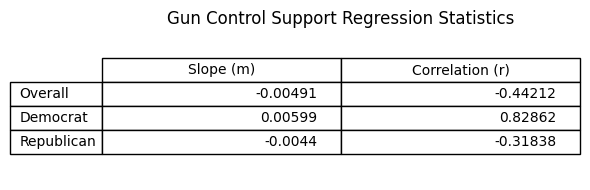

In [92]:
guncontrol_overall_stats = regression_stats(pid_range, guncontrol_overall_percent)
guncontrol_democrat_stats = regression_stats(pid_range, guncontrol_democrat_percent)
guncontrol_republican_stats = regression_stats(pid_range, guncontrol_republican_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Overall", "Democrat", "Republican"]
data = [guncontrol_overall_stats, guncontrol_democrat_stats, guncontrol_republican_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("Gun Control Support Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/guncontrol_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

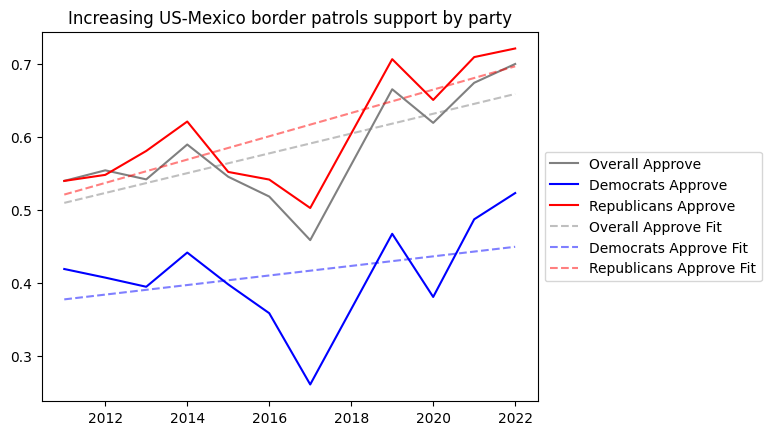

In [108]:
bordersecurity_overall_percent = []
bordersecurity_democrat_percent = []
bordersecurity_republican_percent = []
pid_range = np.arange(2011,2023)
skipped = []
for year in pid_range:
    if 'bordersecurity' not in df_dict[year].keys():
        skipped.append(year)
        continue   
    year_df = df_dict[year]
    # Overall weighted approval
    overall_weight = np.sum(year_df['weight'])
    overall_approval_weighted = np.dot(year_df['bordersecurity'] == 1, year_df['weight'])
    bordersecurity_overall_percent.append(overall_approval_weighted / overall_weight)
    
    # Approval for Democrats
    dem_df = year_df[year_df['pid3'].isin([1, 'Democrat', 'democrat'])]
    dem_weight = np.sum(dem_df['weight'])
    dem_approval_weighted = np.dot((dem_df['bordersecurity'] == 1), dem_df['weight'])
    bordersecurity_democrat_percent.append(dem_approval_weighted / dem_weight)
    
    # Approval for Republicans
    rep_df = year_df[year_df['pid3'].isin([3, 'Republican', 'republican'])]
    rep_weight = np.sum(rep_df['weight'])
    rep_approval_weighted = np.dot((rep_df['bordersecurity'] == 1), rep_df['weight'])
    bordersecurity_republican_percent.append(rep_approval_weighted / rep_weight)

for i in range(len(skipped)):
    pid_range = pid_range[pid_range != skipped[i]]

plt.plot(pid_range, bordersecurity_overall_percent, c='grey')
plt.plot(pid_range, bordersecurity_democrat_percent, c='blue')
plt.plot(pid_range, bordersecurity_republican_percent, c='red')

bordersecurity_overall_fit = linear_fit(pid_range, bordersecurity_overall_percent)
bordersecurity_democrat_fit = linear_fit(pid_range, bordersecurity_democrat_percent)
bordersecurity_republican_fit = linear_fit(pid_range, bordersecurity_republican_percent)

plt.plot(pid_range, bordersecurity_overall_fit, color='grey', linestyle='--', alpha=0.5)
plt.plot(pid_range, bordersecurity_democrat_fit, 'b--', alpha=0.5)
plt.plot(pid_range, bordersecurity_republican_fit, 'r--', alpha=0.5)

plt.legend(["Overall Approve", "Democrats Approve", "Republicans Approve",
            "Overall Approve Fit", "Democrats Approve Fit", "Republicans Approve Fit"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Increasing US-Mexico border patrols support by party")
plt.savefig("figures/bordersecurity_approval.png", bbox_inches='tight')
plt.show()

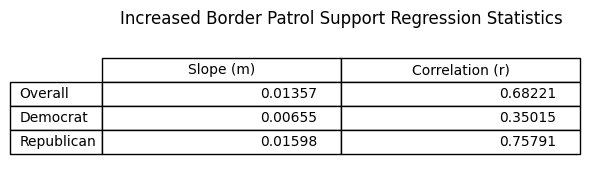

In [109]:
bordersecurity_overall_stats = regression_stats(pid_range, bordersecurity_overall_percent)
bordersecurity_democrat_stats = regression_stats(pid_range, bordersecurity_democrat_percent)
bordersecurity_republican_stats = regression_stats(pid_range, bordersecurity_republican_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Overall", "Democrat", "Republican"]
data = [bordersecurity_overall_stats, bordersecurity_democrat_stats, bordersecurity_republican_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("Increased Border Patrol Support Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/bordersecurity_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

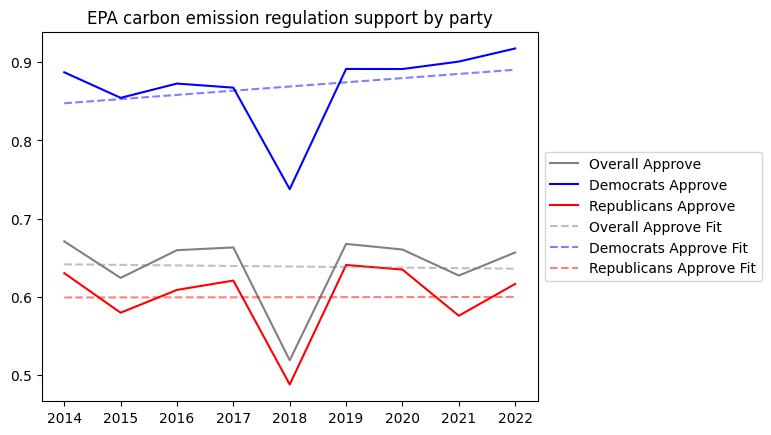

In [115]:
enviornment_overall_percent = []
enviornment_democrat_percent = []
enviornment_republican_percent = []
pid_range = np.arange(2014,2023)
skipped = []
for year in pid_range:
    if 'enviornment' not in df_dict[year].keys():
        skipped.append(year)
        continue   
    year_df = df_dict[year]
    # Overall weighted approval
    overall_weight = np.sum(year_df['weight'])
    overall_approval_weighted = np.dot(year_df['enviornment'] == 1, year_df['weight'])
    enviornment_overall_percent.append(overall_approval_weighted / overall_weight)
    
    # Approval for Democrats
    dem_df = year_df[year_df['pid3'].isin([1, 'Democrat', 'democrat'])]
    dem_weight = np.sum(dem_df['weight'])
    dem_approval_weighted = np.dot((dem_df['enviornment'] == 1), dem_df['weight'])
    enviornment_democrat_percent.append(dem_approval_weighted / dem_weight)
    
    # Approval for Republicans
    rep_df = year_df[year_df['pid3'].isin([3, 'Republican', 'republican'])]
    rep_weight = np.sum(rep_df['weight'])
    rep_approval_weighted = np.dot((rep_df['enviornment'] == 1), rep_df['weight'])
    enviornment_republican_percent.append(rep_approval_weighted / rep_weight)

for i in range(len(skipped)):
    pid_range = pid_range[pid_range != skipped[i]]

plt.plot(pid_range, enviornment_overall_percent, c='grey')
plt.plot(pid_range, enviornment_democrat_percent, c='blue')
plt.plot(pid_range, enviornment_republican_percent, c='red')

enviornment_overall_fit = linear_fit(pid_range, enviornment_overall_percent)
enviornment_democrat_fit = linear_fit(pid_range, enviornment_democrat_percent)
enviornment_republican_fit = linear_fit(pid_range, enviornment_republican_percent)

plt.plot(pid_range, enviornment_overall_fit, color='grey', linestyle='--', alpha=0.5)
plt.plot(pid_range, enviornment_democrat_fit, 'b--', alpha=0.5)
plt.plot(pid_range, enviornment_republican_fit, 'r--', alpha=0.5)

plt.legend(["Overall Approve", "Democrats Approve", "Republicans Approve",
            "Overall Approve Fit", "Democrats Approve Fit", "Republicans Approve Fit"], 
            loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("EPA carbon emission regulation support by party")
plt.savefig("figures/enviornment_approval.png", bbox_inches='tight')
plt.show()

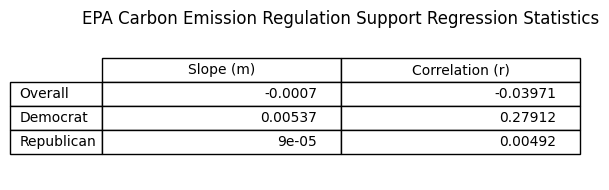

In [116]:
enviornment_overall_stats = regression_stats(pid_range, enviornment_overall_percent)
enviornment_democrat_stats = regression_stats(pid_range, enviornment_democrat_percent)
enviornment_republican_stats = regression_stats(pid_range, enviornment_republican_percent)

columns = ["Slope (m)", "Correlation (r)"]
rows = ["Overall", "Democrat", "Republican"]
data = [enviornment_overall_stats, enviornment_democrat_stats, enviornment_republican_stats]

# Plotting the table
fig, ax = plt.subplots(1, 1, figsize=(6, 2))
ax.axis('tight')
ax.axis('off')

the_table = ax.table(cellText=data,
                     rowLabels=rows,
                     colLabels=columns,
                     loc='center')
the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1, 1.5)  # Adjust column width and row height

plt.title("EPA Carbon Emission Regulation Support Regression Statistics")
plt.tight_layout()  # Improve the layout
plt.savefig('figures/enviornment_approval_r.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

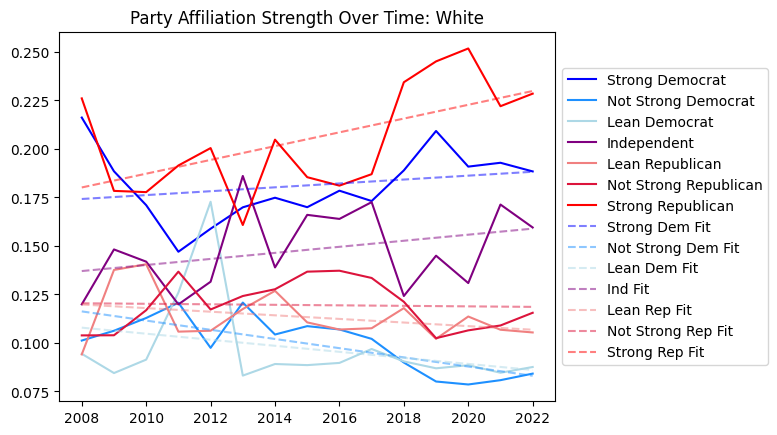

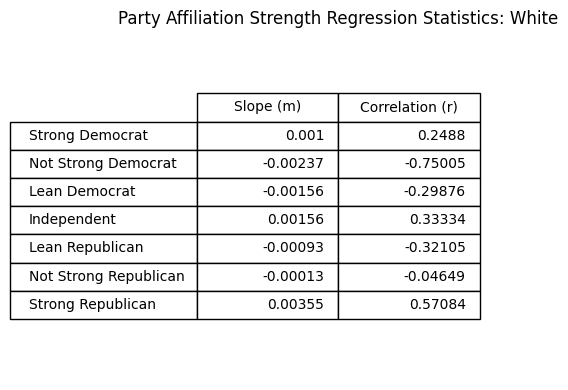

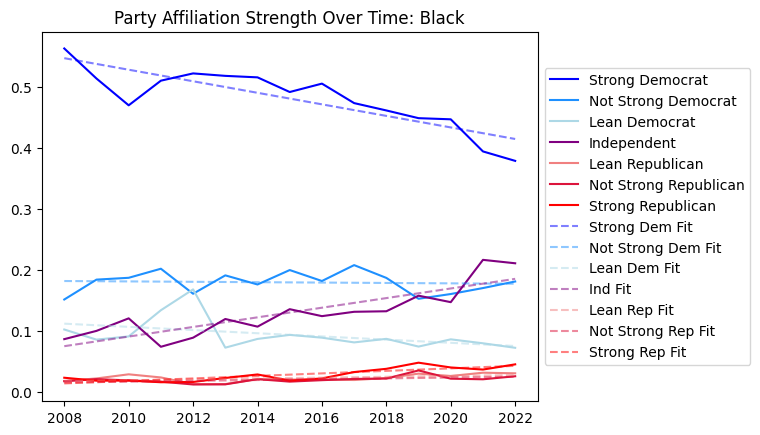

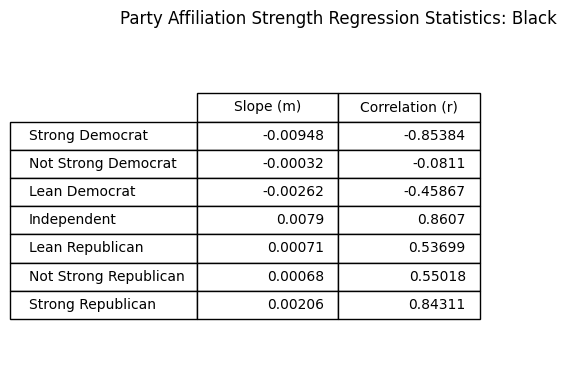

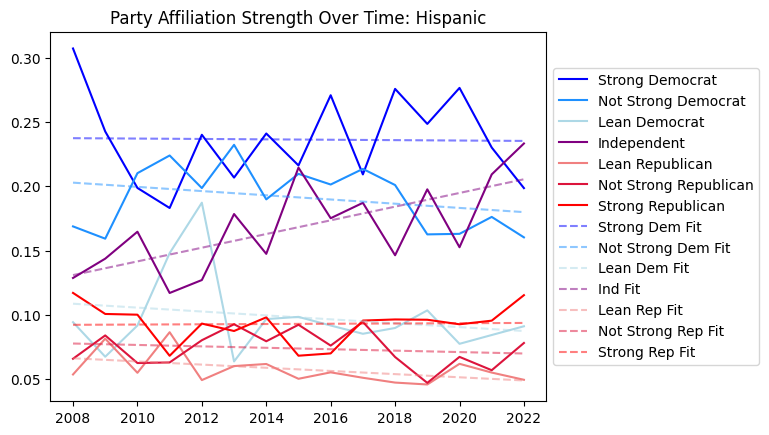

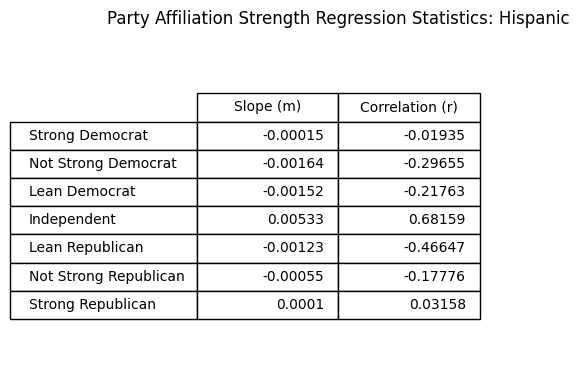

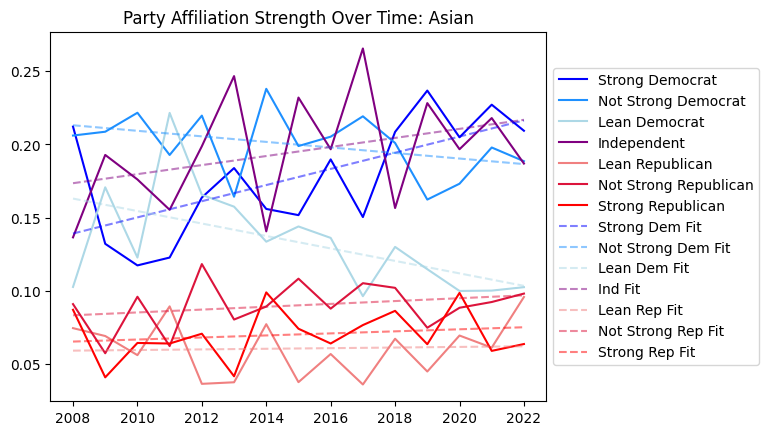

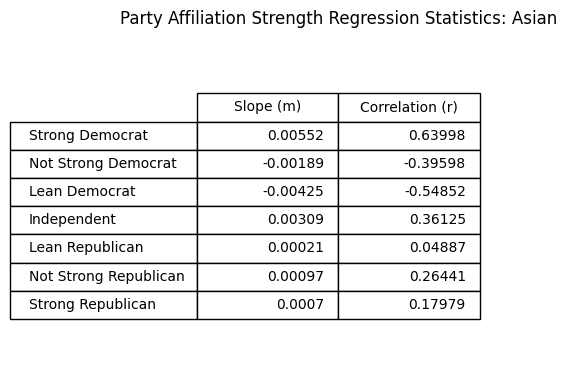

In [25]:
race_dict = {1: 'White', 2: 'Black', 3: 'Hispanic', 4: 'Asian'}
for i in range(1, 5):
        strong_dem_percent = []
        not_strong_dem_percent = []
        lean_dem_percent = []
        ind_percent = []
        lean_rep_percent = []
        not_strong_rep_percent = []
        strong_rep_percent = []
        pid_range = np.arange(2008,2023)
        race = race_dict[i].lower()
        for year in pid_range:
                year_df = df_dict[year]
                filtered_df = year_df[(year_df['race'] == i) | (year_df['race'] == race) | (year_df['race'] == race_dict[i])]

                strong_dem_percent.append(np.dot(filtered_df['pid7'].isin([1, 'Strong Democrat', 'strong democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                not_strong_dem_percent.append(np.dot(filtered_df['pid7'].isin([2, 'Not very strong Democrat', 'not very strong democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                lean_dem_percent.append(np.dot(filtered_df['pid7'].isin([3, 'Lean Democrat', 'lean democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                ind_percent.append(np.dot(filtered_df['pid7'].isin([4, 'Independent', 'independent']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                lean_rep_percent.append(np.dot(filtered_df['pid7'].isin([5, 'Lean Republican', 'lean republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                not_strong_rep_percent.append(np.dot(filtered_df['pid7'].isin([6, 'Not very strong Republican', 'not very strong republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                strong_rep_percent.append(np.dot(filtered_df['pid7'].isin([7, 'Strong Republican', 'strong republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))


        plt.plot(pid_range, strong_dem_percent, c='blue')
        plt.plot(pid_range, not_strong_dem_percent, c='dodgerblue')
        plt.plot(pid_range, lean_dem_percent, c='lightblue')
        plt.plot(pid_range, ind_percent, c='purple')
        plt.plot(pid_range, lean_rep_percent, c='lightcoral')
        plt.plot(pid_range, not_strong_rep_percent, c='crimson')
        plt.plot(pid_range, strong_rep_percent, c='red')

        dem_fit = linear_fit(pid_range, dem_percent)
        rep_fit = linear_fit(pid_range, rep_percent)
        ind_fit = linear_fit(pid_range, ind_percent)
        other_fit = linear_fit(pid_range, other_percent)

        fit_strong_dem = linear_fit(pid_range, strong_dem_percent)
        fit_not_strong_dem = linear_fit(pid_range, not_strong_dem_percent)
        fit_lean_dem = linear_fit(pid_range, lean_dem_percent)
        fit_ind = linear_fit(pid_range, ind_percent)
        fit_lean_rep = linear_fit(pid_range, lean_rep_percent)
        fit_not_strong_rep = linear_fit(pid_range, not_strong_rep_percent)
        fit_strong_rep = linear_fit(pid_range, strong_rep_percent)

        plt.plot(pid_range, fit_strong_dem, color='blue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_not_strong_dem, color='dodgerblue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_lean_dem, color='lightblue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_ind, color='purple', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_lean_rep, color='lightcoral', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_not_strong_rep, color='crimson', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_strong_rep, color='red', linestyle='--', alpha=0.5)

        plt.legend(["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
                "Lean Republican", "Not Strong Republican", "Strong Republican",
                "Strong Dem Fit", "Not Strong Dem Fit", "Lean Dem Fit", "Ind Fit",
                "Lean Rep Fit", "Not Strong Rep Fit", "Strong Rep Fit"],
                loc='center left', bbox_to_anchor=(1, 0.5))

        plt.title(f"Party Affiliation Strength Over Time: {race_dict[i]}")
        plt.savefig(f"figures/race_party_affiliation_strength_{race}.png", bbox_inches='tight')
        plt.show()

        dem_stats_strong = regression_stats(pid_range, strong_dem_percent)
        dem_stats_not_strong = regression_stats(pid_range, not_strong_dem_percent)
        dem_stats_lean = regression_stats(pid_range, lean_dem_percent)
        ind_stats = regression_stats(pid_range, ind_percent)
        rep_stats_lean = regression_stats(pid_range, lean_rep_percent)
        rep_stats_not_strong = regression_stats(pid_range, not_strong_rep_percent)
        rep_stats_strong = regression_stats(pid_range, strong_rep_percent)

        # Data for the table
        columns = ["Slope (m)", "Correlation (r)"]
        rows = ["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
                "Lean Republican", "Not Strong Republican", "Strong Republican"]
        data = [dem_stats_strong, dem_stats_not_strong, dem_stats_lean, ind_stats,
                rep_stats_lean, rep_stats_not_strong, rep_stats_strong]

        # Plotting the table
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))
        ax.axis('tight')
        ax.axis('off')

        the_table = ax.table(cellText=data,
                        rowLabels=rows,
                        colLabels=columns,
                        loc='center')
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)
        the_table.scale(1, 1.5)  # Adjust column width and row height

        plt.title(f'Party Affiliation Strength Regression Statistics: {race_dict[i]}')
        plt.tight_layout()  # Improve the layout
        plt.savefig(f'figures/race_party_affiliation_strength_{race}_r.png', bbox_inches='tight', pad_inches=0.1)
        plt.show()

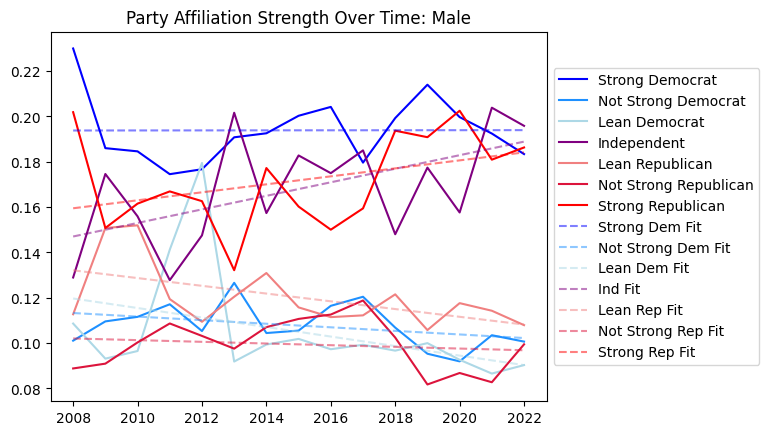

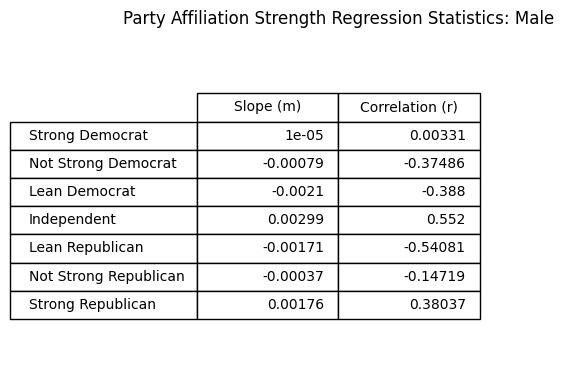

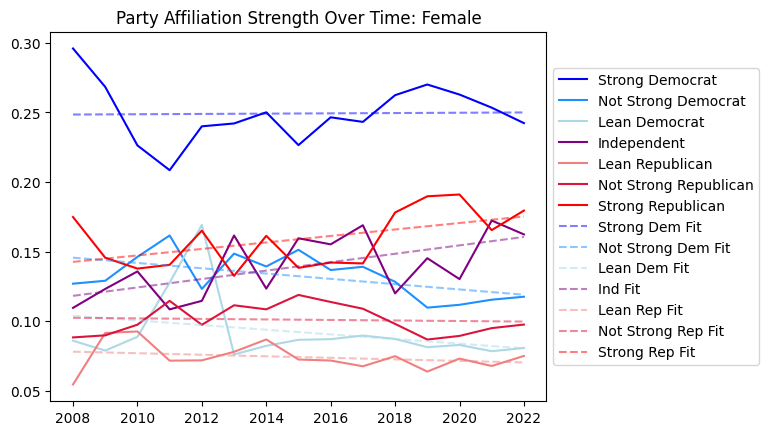

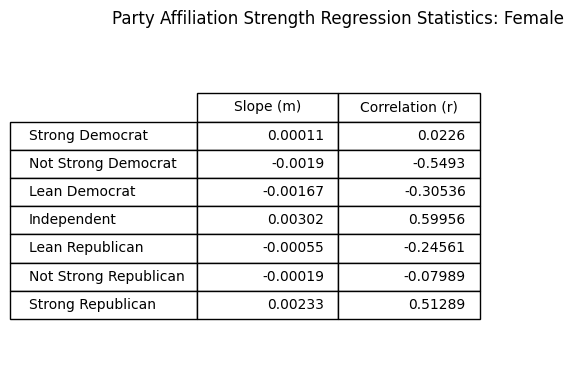

In [43]:
gender_dict = {1: 'Male', 2: 'Female'}
for i in range(1, 3):
        strong_dem_percent = []
        not_strong_dem_percent = []
        lean_dem_percent = []
        ind_percent = []
        lean_rep_percent = []
        not_strong_rep_percent = []
        strong_rep_percent = []
        pid_range = np.arange(2008,2023)
        gender = gender_dict[i].lower()
        for year in pid_range:
                year_df = df_dict[year]
                filtered_df = year_df[(year_df['gender'] == i) | (year_df['gender'] == gender) | (year_df['gender'] == gender_dict[i])]

                strong_dem_percent.append(np.dot(filtered_df['pid7'].isin([1, 'Strong Democrat', 'strong democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                not_strong_dem_percent.append(np.dot(filtered_df['pid7'].isin([2, 'Not very strong Democrat', 'not very strong democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                lean_dem_percent.append(np.dot(filtered_df['pid7'].isin([3, 'Lean Democrat', 'lean democrat']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                ind_percent.append(np.dot(filtered_df['pid7'].isin([4, 'Independent', 'independent']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                lean_rep_percent.append(np.dot(filtered_df['pid7'].isin([5, 'Lean Republican', 'lean republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                not_strong_rep_percent.append(np.dot(filtered_df['pid7'].isin([6, 'Not very strong Republican', 'not very strong republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))
                strong_rep_percent.append(np.dot(filtered_df['pid7'].isin([7, 'Strong Republican', 'strong republican']), filtered_df['weight']) / np.sum(filtered_df['weight']))


        plt.plot(pid_range, strong_dem_percent, c='blue')
        plt.plot(pid_range, not_strong_dem_percent, c='dodgerblue')
        plt.plot(pid_range, lean_dem_percent, c='lightblue')
        plt.plot(pid_range, ind_percent, c='purple')
        plt.plot(pid_range, lean_rep_percent, c='lightcoral')
        plt.plot(pid_range, not_strong_rep_percent, c='crimson')
        plt.plot(pid_range, strong_rep_percent, c='red')

        dem_fit = linear_fit(pid_range, dem_percent)
        rep_fit = linear_fit(pid_range, rep_percent)
        ind_fit = linear_fit(pid_range, ind_percent)
        other_fit = linear_fit(pid_range, other_percent)

        fit_strong_dem = linear_fit(pid_range, strong_dem_percent)
        fit_not_strong_dem = linear_fit(pid_range, not_strong_dem_percent)
        fit_lean_dem = linear_fit(pid_range, lean_dem_percent)
        fit_ind = linear_fit(pid_range, ind_percent)
        fit_lean_rep = linear_fit(pid_range, lean_rep_percent)
        fit_not_strong_rep = linear_fit(pid_range, not_strong_rep_percent)
        fit_strong_rep = linear_fit(pid_range, strong_rep_percent)

        plt.plot(pid_range, fit_strong_dem, color='blue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_not_strong_dem, color='dodgerblue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_lean_dem, color='lightblue', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_ind, color='purple', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_lean_rep, color='lightcoral', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_not_strong_rep, color='crimson', linestyle='--', alpha=0.5)
        plt.plot(pid_range, fit_strong_rep, color='red', linestyle='--', alpha=0.5)

        plt.legend(["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
                "Lean Republican", "Not Strong Republican", "Strong Republican",
                "Strong Dem Fit", "Not Strong Dem Fit", "Lean Dem Fit", "Ind Fit",
                "Lean Rep Fit", "Not Strong Rep Fit", "Strong Rep Fit"],
                loc='center left', bbox_to_anchor=(1, 0.5))

        plt.title(f"Party Affiliation Strength Over Time: {gender_dict[i]}")
        plt.savefig(f"figures/gender_party_affiliation_strength_{gender}.png", bbox_inches='tight')
        plt.show()

        dem_stats_strong = regression_stats(pid_range, strong_dem_percent)
        dem_stats_not_strong = regression_stats(pid_range, not_strong_dem_percent)
        dem_stats_lean = regression_stats(pid_range, lean_dem_percent)
        ind_stats = regression_stats(pid_range, ind_percent)
        rep_stats_lean = regression_stats(pid_range, lean_rep_percent)
        rep_stats_not_strong = regression_stats(pid_range, not_strong_rep_percent)
        rep_stats_strong = regression_stats(pid_range, strong_rep_percent)

        # Data for the table
        columns = ["Slope (m)", "Correlation (r)"]
        rows = ["Strong Democrat", "Not Strong Democrat", "Lean Democrat", "Independent",
                "Lean Republican", "Not Strong Republican", "Strong Republican"]
        data = [dem_stats_strong, dem_stats_not_strong, dem_stats_lean, ind_stats,
                rep_stats_lean, rep_stats_not_strong, rep_stats_strong]

        # Plotting the table
        fig, ax = plt.subplots(1, 1, figsize=(5, 4))
        ax.axis('tight')
        ax.axis('off')

        the_table = ax.table(cellText=data,
                        rowLabels=rows,
                        colLabels=columns,
                        loc='center')
        the_table.auto_set_font_size(False)
        the_table.set_fontsize(10)
        the_table.scale(1, 1.5)  # Adjust column width and row height

        plt.title(f'Party Affiliation Strength Regression Statistics: {gender_dict[i]}')
        plt.tight_layout()  # Improve the layout
        plt.savefig(f'figures/gender_party_affiliation_strength_{gender}_r.png', bbox_inches='tight', pad_inches=0.1)
        plt.show()

In [28]:
df22 = pd.read_csv('data/CESdata2022.tab', delimiter='\t')
print(df22['gender4'].head(10))


0    1
1    1
2    2
3    3
4    1
5    1
6    2
7    1
8    2
9    1
Name: gender4, dtype: int64


In [42]:
year_df = df_dict[2010]
i = 1
gender = gender_dict[i]
filtered_df = year_df[(year_df['gender'] == i) | (year_df['gender'] == gender) | (year_df['race'] == gender_dict[i])]
print(len(filtered_df))
print(filtered_df['gender'])
print("break")
print(year_df['gender'])

26723
1        Male
3        Male
6        Male
11       Male
12       Male
         ... 
55370    Male
55377    Male
55384    Male
55386    Male
55389    Male
Name: gender, Length: 26723, dtype: category
Categories (2, object): ['Male' < 'Female']
break
0        Female
1          Male
2        Female
3          Male
4        Female
          ...  
55395    Female
55396    Female
55397    Female
55398    Female
55399    Female
Name: gender, Length: 55400, dtype: category
Categories (2, object): ['Male' < 'Female']
